In [ ]:
import pandas as pd
import nltk
from nltk.collocations import *
bigram_assoc_measures = nltk.collocations.BigramAssocMeasures()

In [ ]:
df = pd.read_csv('dataset-inglese-ngrams.csv', index_col=0, low_memory=False)

In [ ]:
df.tail(20)

In [ ]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

minimum_number_of_bigrams = 2
top_bigrams_to_return = 1

# Create the BigramCollocationFinder from the 'bigrams' column
finder = BigramCollocationFinder.from_words(df['bigrams'])

# Apply the frequency filter
finder.apply_freq_filter(minimum_number_of_bigrams)

# Retrieve the top bigram using PMI measure
top_bigrams = finder.nbest(BigramAssocMeasures.pmi, top_bigrams_to_return)

print(top_bigrams)


In [ ]:
# Sort bigrams by frequency in ascending order
least_frequent_bigrams = sorted(finder.ngram_fd.items(), key=lambda item: item[1])

# Retrieve the least frequent bigrams
least_frequent_bigrams = least_frequent_bigrams[:top_bigrams_to_return]

print(least_frequent_bigrams)

In [ ]:
df1 = df['bigrams'].explode()

In [ ]:
df1.head()

In [ ]:
bigram_counts = df1.value_counts().head(10)

In [ ]:
bigram_counts

In [1]:
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [2]:
def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        s = re.sub('\s+',' ', s)
        s = str(s).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = [word for word in tokens if word not in ['alexa', 'echo', 'dot']]
        review = ' '.join(tokens)
        cleanedReviews.append(review)
    return(cleanedReviews)

In [3]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [4]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

In [5]:
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews)

In [7]:
data = pd.read_csv('dataset-inglese-ngrams.csv', index_col=0, low_memory=False)
data.head()

,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,User,replyCount,unigrams,bigrams,trigrams
user,,,,,,,,,,,,
jdemay,05-02-2023,0,Planning use ChatGPT help high school math May...,['ChatGPT'],en,0.0,0.0,NaN,NaN,"[('Planning',), ('use',), ('ChatGPT',), ('help...","[('Planning', 'use'), ('use', 'ChatGPT'), ('Ch...","[('Planning', 'use', 'ChatGPT'), ('use', 'Chat..."
CarlosSilvaB81,05-02-2023,3,Carmtans stkirsch Chat gpt nothing super searc...,NaN,en,0.0,0.0,NaN,NaN,"[('Carmtans',), ('stkirsch',), ('Chat',), ('gp...","[('Carmtans', 'stkirsch'), ('stkirsch', 'Chat'...","[('Carmtans', 'stkirsch', 'Chat'), ('stkirsch'..."
saadnajeebsaad,05-02-2023,0,WeatherUpdate Karachi Khi TempUpdate Sunrise S...,"['WeatherUpdate', 'Karachi', 'Khi', 'TempUpdat...",en,0.0,0.0,NaN,NaN,"[('WeatherUpdate',), ('Karachi',), ('Khi',), (...","[('WeatherUpdate', 'Karachi'), ('Karachi', 'Kh...","[('WeatherUpdate', 'Karachi', 'Khi'), ('Karach..."
RyanMac69987725,05-02-2023,0,MKBHD lead Microsoft acquired Chat GPT,NaN,en,0.0,0.0,NaN,NaN,"[('MKBHD',), ('lead',), ('Microsoft',), ('acqu...","[('MKBHD', 'lead'), ('lead', 'Microsoft'), ('M...","[('MKBHD', 'lead', 'Microsoft'), ('lead', 'Mic..."
sjfcommo,05-02-2023,1,ChatGPT seems like great way start creating co...,['ChatGPT'],en,0.0,0.0,NaN,NaN,"[('ChatGPT',), ('seems',), ('like',), ('great'...","[('ChatGPT', 'seems'), ('seems', 'like'), ('li...","[('ChatGPT', 'seems', 'like'), ('seems', 'like..."


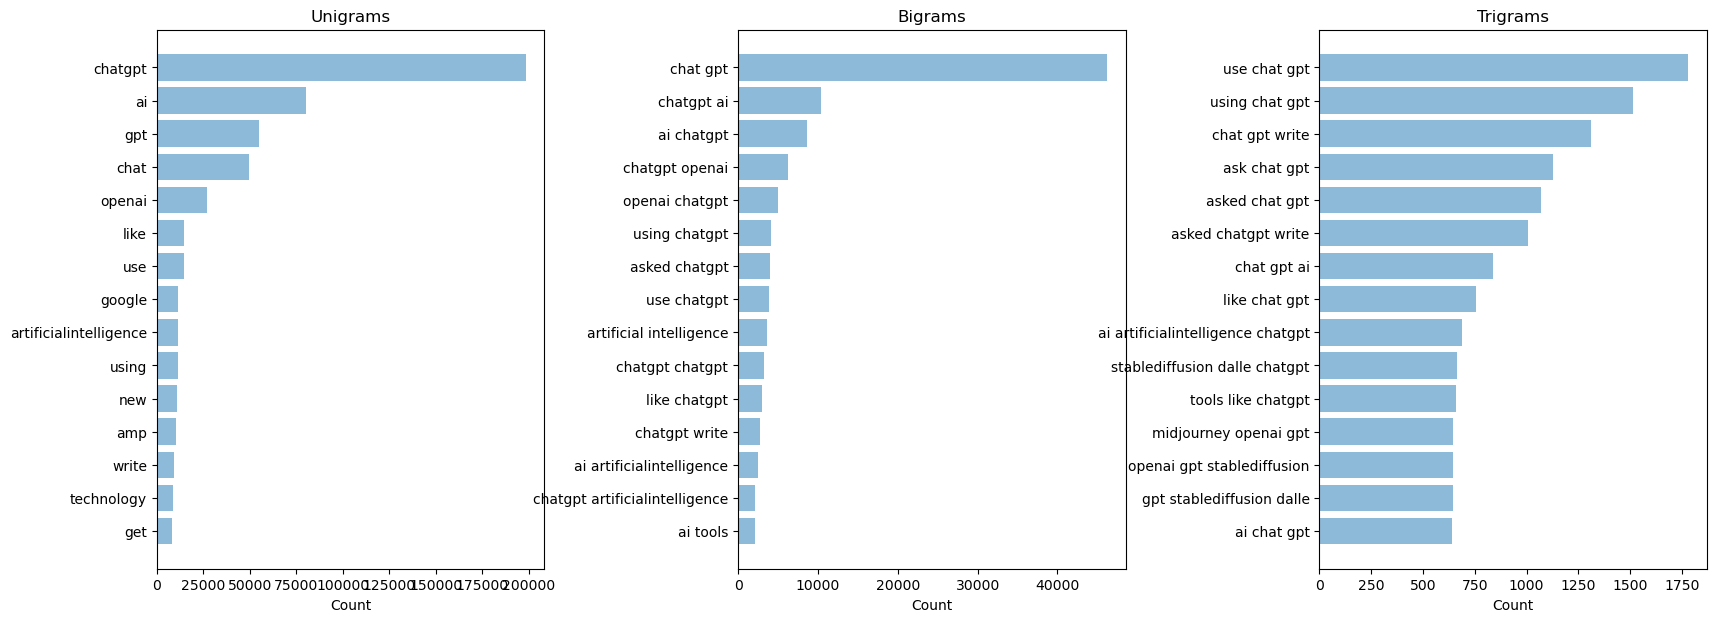

In [8]:
textTrends(data['tweetText'])